<a href="https://colab.research.google.com/github/Giandonn/data-science/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados nulos em cada coluna:
Número               0
Name                 0
Type1                0
Type2              386
HP                   0
Ataque               0
Defesa               0
Ataque Especial      0
Defesa Especial      0
Velocidade           0
Geração              0
Lendário             0
dtype: int64

Primeiras linhas do DataFrame após o tratamento de dados nulos:
   Número                   Name  Type1   Type2  HP  Ataque  Defesa  \
0       1              Bulbasaur  Grass  Poison  45      49      49   
1       2                Ivysaur  Grass  Poison  60      62      63   
2       3               Venusaur  Grass  Poison  80      82      83   
3       3  VenusaurMega Venusaur  Grass  Poison  80     100     123   
4       4             Charmander   Fire     NaN  39      52      43   

   Ataque Especial  Defesa Especial  Velocidade  Geração  Lendário  
0               65               65          45        1     False  
1               80               80          60      

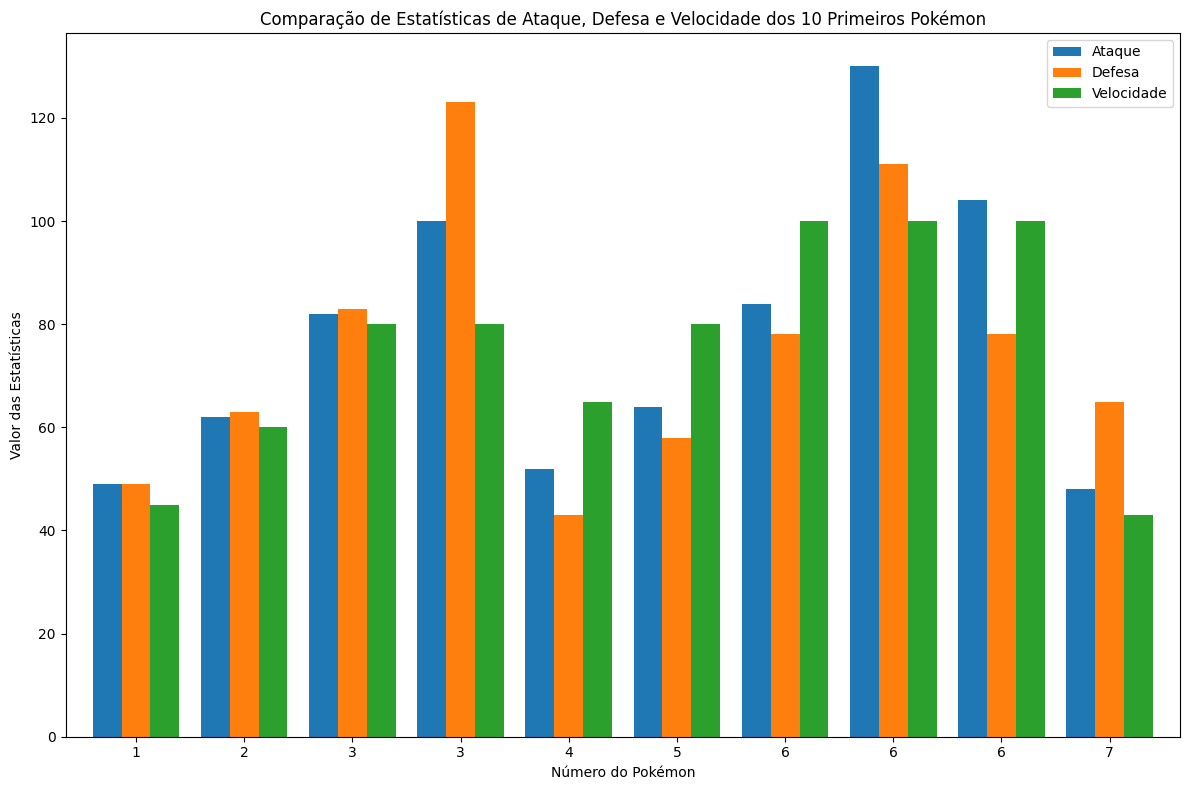


Correlação entre Ataque, Defesa e Velocidade:
              Ataque    Defesa  Velocidade
Ataque      1.000000  0.438687    0.381240
Defesa      0.438687  1.000000    0.015227
Velocidade  0.381240  0.015227    1.000000


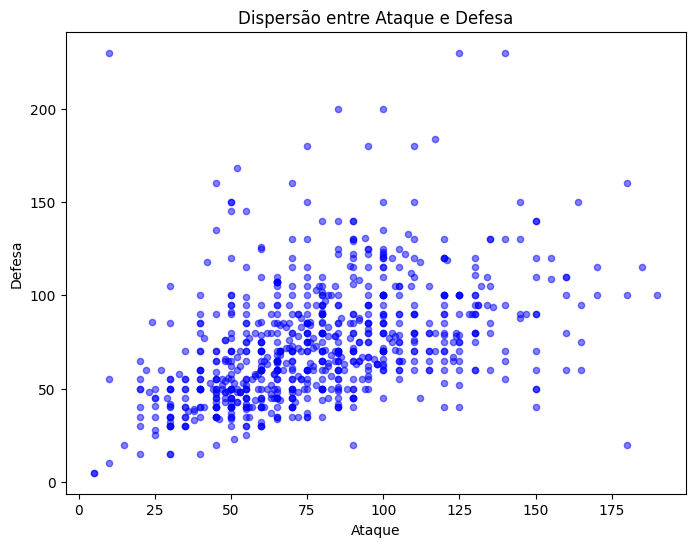

In [22]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/PokemonData.csv')

# Renomeando as colunas para português
df.rename(columns={
    'Num': 'Número',
    'HP': 'HP',
    'Attack': 'Ataque',
    'Defense': 'Defesa',
    'SpAtk': 'Ataque Especial',
    'SpDef': 'Defesa Especial',
    'Speed': 'Velocidade',
    'Generation': 'Geração',
    'Legendary': 'Lendário'
}, inplace=True)

nulos = df.isnull().sum()
print("Dados nulos em cada coluna:")
print(nulos)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

print("\nPrimeiras linhas do DataFrame após o tratamento de dados nulos:")
print(df.head())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nContagem de Pokémon por Geração:")
print(df['Geração'].value_counts())

print("\nContagem de Pokémon Lendários:")
print(df['Lendário'].value_counts())

df_subset = df[['Número', 'Ataque', 'Defesa', 'Velocidade']].head(10)

# Criando o gráfico para comparar as estatísticas dos 10 primeiros Pokémon
fig, ax = plt.subplots(figsize=(12, 8))
df_subset.set_index('Número')[['Ataque', 'Defesa', 'Velocidade']].plot(kind='bar', ax=ax, width=0.8)

plt.title('Comparação de Estatísticas de Ataque, Defesa e Velocidade dos 10 Primeiros Pokémon')
plt.xlabel('Número do Pokémon')
plt.ylabel('Valor das Estatísticas')

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

corr = df[['Ataque', 'Defesa', 'Velocidade']].corr()
print("\nCorrelação entre Ataque, Defesa e Velocidade:")
print(corr)

fig, ax = plt.subplots(figsize=(8, 6))
df.plot.scatter(x='Ataque', y='Defesa', ax=ax, color='blue', alpha=0.5)
plt.title('Dispersão entre Ataque e Defesa')
plt.xlabel('Ataque')
plt.ylabel('Defesa')
plt.show()
